In [1]:
import pandas as pd
import numpy as np


In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rishi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
from pandas_datareader import data as wb

In [6]:
pg = wb.DataReader('PG',data_source='yahoo', start='1995-1-1' )

In [7]:
pg

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.926648
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.863107
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.751915
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.767798
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.736026
...,...,...,...,...,...,...
2022-06-01,148.119995,144.710007,148.000000,145.639999,7036000.0,145.639999
2022-06-02,147.259995,142.630005,145.970001,147.210007,6479800.0,147.210007
2022-06-03,147.210007,145.119995,146.360001,145.889999,4719700.0,145.889999


In [12]:
tickers = ['AAPL', 'MSFT', 'PG', 'T', 'F']
new_data = pd.DataFrame()
for ticker in tickers:
    new_data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='1995-1-1')['Adj Close']

In [13]:
new_data

,AAPL,MSFT,PG,T,F
Date,,,,,
1995-01-03,0.289652,2.364447,7.926648,2.769335,4.307288
1995-01-04,0.297200,2.381634,7.863110,2.762289,4.423179
1995-01-05,0.293425,2.342350,7.751916,2.805450,4.384547
1995-01-06,0.317013,2.381634,7.767799,2.805450,4.384547
1995-01-09,0.310998,2.366902,7.736023,2.796818,4.461810
...,...,...,...,...,...
2022-06-01,148.710007,272.420013,145.639999,21.219999,13.550000
2022-06-02,151.210007,274.579987,147.210007,21.190001,13.890000
2022-06-03,145.380005,270.019989,145.889999,20.900000,13.500000


In [1]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pg = wb.DataReader('pg', data_source='yahoo', start='1995-1-1')

In [5]:
pg['simple return'] = pg['Adj Close'].pct_change()

In [8]:
pg['simple return'].mean() * 250

0.13067866379015614

In [15]:
pg['simple return'] = (pg['Adj Close'] / pg['Adj Close'].shift(1)) -  1

In [18]:
rtn = pg['simple return'].mean() * 250

In [24]:
print(round(rtn, 5)*100, '%')

13.068 %


In [27]:
pg['log_rtn'] = np.log(pg['Adj Close']/pg['Adj Close'].shift(1))

In [31]:
anual_log = pg['log_rtn'].mean() * 250

In [32]:
anual_log * 100

10.559782246978386

In [35]:
tickers = ['pg', 'f', 'ge', 'msft']
pf = pd.DataFrame()
for ticker in tickers:
    pf[ticker] = wb.DataReader(ticker, data_source='yahoo', start='1995-1-1')['Adj Close']
    

In [40]:
pf

,pg,f,ge,msft
Date,,,,
1995-01-03,7.926651,4.307285,32.847813,2.364447
1995-01-04,7.863107,4.423179,32.847813,2.381634
1995-01-05,7.751913,4.384549,32.928318,2.342350
1995-01-06,7.767798,4.384549,32.767303,2.381634
1995-01-09,7.736028,4.461809,32.445271,2.366902
...,...,...,...,...
2022-06-01,145.639999,13.550000,77.519997,272.420013
2022-06-02,147.210007,13.890000,78.000000,274.579987
2022-06-03,145.889999,13.500000,76.970001,270.019989


In [63]:
wt = np.array((0.16, 0.17, 0.17, 0.50))

In [54]:
simple_rtn = pf.pct_change()

In [58]:
annual = simple_rtn.mean() * 250

In [61]:
pct_rtn = annual * 100

In [66]:
pf_rtn = np.dot(pct_rtn, wt)

In [67]:
pf_rtn

16.629420515292047

<AxesSubplot:xlabel='Date'>

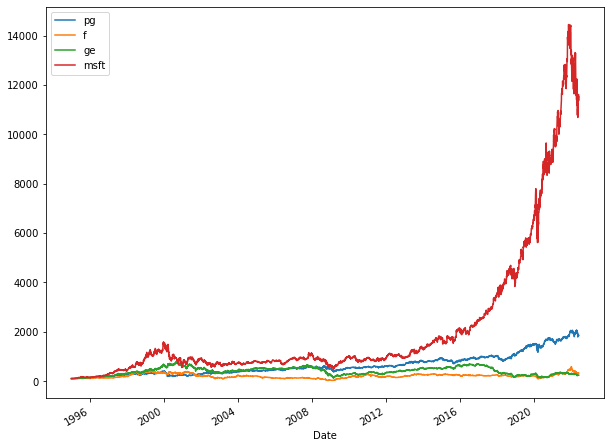

In [48]:
(pf/pf.iloc[0] * 100).plot(figsize=(10,8), legend=True)

In [1]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']
df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2018-1-2')['Adj Close']

In [3]:
df


,^GSPC,^IXIC,^GDAXI
Date,,,
2018-01-02,2695.810059,7006.899902,12871.389648
2018-01-03,2713.060059,7065.529785,12978.209961
2018-01-04,2723.989990,7077.910156,13167.889648
2018-01-05,2743.149902,7136.560059,13319.639648
2018-01-08,2747.709961,7157.390137,13367.780273
...,...,...,...
2022-06-02,4176.819824,12316.900391,14485.169922
2022-06-03,4108.540039,12012.730469,14460.089844
2022-06-06,4121.430176,12061.370117,14653.809570


<AxesSubplot:xlabel='Date'>

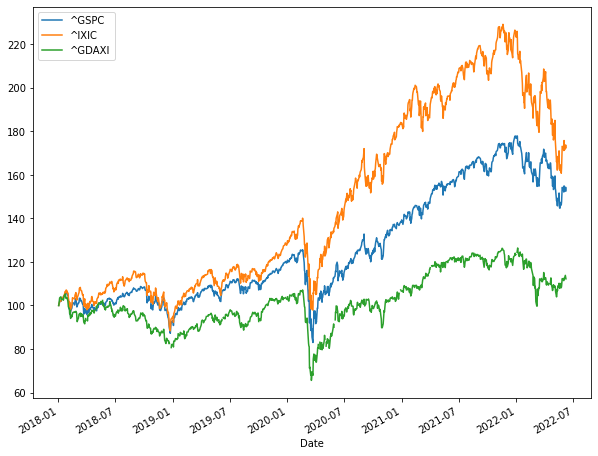

In [4]:
(df/df.iloc[0] * 100).plot(figsize=(10,8))

In [5]:
df/df.iloc[0] * 100

,^GSPC,^IXIC,^GDAXI
Date,,,
2018-01-02,100.000000,100.000000,100.000000
2018-01-03,100.639882,100.836745,100.829905
2018-01-04,101.045323,101.013433,102.303559
2018-01-05,101.756053,101.850464,103.482530
2018-01-08,101.925206,102.147743,103.856543
...,...,...,...
2022-06-02,154.937467,175.782451,112.537731
2022-06-03,152.404656,171.441445,112.342880
2022-06-06,152.882810,172.135613,113.847921


In [6]:
df.pct_change().mean() * 250

^GSPC     0.117936
^IXIC     0.153218
^GDAXI    0.048873
dtype: float64

In [6]:
tickers = ['pg', 'bei.de','TCS.NS']
vol = pd.DataFrame()
for ticker in tickers:
    vol[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [8]:
vol = np.log(vol/vol.shift(1))

In [9]:
vol.head()

,pg,bei.de,TCS.NS
Date,,,
2007-01-03,NaN,NaN,NaN
2007-01-04,-0.007621,0.006545,-0.016620
2007-01-05,-0.008624,-0.020772,0.003132
2007-01-08,0.002202,0.000202,-0.015319
2007-01-09,-0.002517,-0.022858,0.010080


In [10]:
vol.pg.mean() * 250

0.08112048168822687

In [11]:
vol['bei.de'].mean() * 250

0.04966525302654056

In [12]:
vol[['pg','bei.de','TCS.NS']].mean() * 250

pg        0.081120
bei.de    0.049665
TCS.NS    0.158940
dtype: float64

In [13]:
vol[['pg','bei.de','TCS.NS']].std() * np.sqrt(250)

pg        0.186645
bei.de    0.218609
TCS.NS    0.306324
dtype: float64

In [1]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt

In [11]:
assets = ['PG', '^GSPC']
df = pd.DataFrame()
for asset in assets:
    df[asset] = wb.DataReader(asset, data_source='yahoo', start='1999-1-1')['Adj Close']

In [12]:
df

,PG,^GSPC
Date,,
1998-12-31,24.844751,1229.229980
1999-01-04,24.487633,1228.099976
1999-01-05,24.912777,1244.780029
1999-01-06,25.201860,1272.339966
1999-01-07,24.725712,1269.729980
...,...,...
2022-06-02,147.210007,4176.819824
2022-06-03,145.889999,4108.540039
2022-06-06,145.320007,4121.430176


<AxesSubplot:xlabel='Date'>

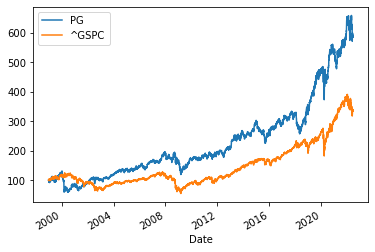

In [14]:
(df/df.iloc[0] * 100).plot()

In [15]:
log_rtn = np.log(df/df.shift(1))

In [18]:
log_rtn.mean() * 250 * 100

PG       7.481964
^GSPC    5.123105
dtype: float64

In [48]:
log_rtn.var() * 250

PG       0.048015
^GSPC    0.038465
dtype: float64

In [46]:
log_rtn.cov() * 250

,PG,^GSPC
PG,0.048015,0.020526
^GSPC,0.020526,0.038465


In [24]:
log_rtn.corr()

,PG,^GSPC
PG,1.00000,0.47761
^GSPC,0.47761,1.00000


In [36]:
num_asset = len(assets)

In [37]:
weights = np.random.random(num_asset)

In [38]:
weights

array([0.76755472, 0.58606866])

In [42]:
weights /= np.sum(weights)

In [43]:
weights

array([0.56703713, 0.43296287])

In [44]:
weights[0] + weights[1]

1.0

### Expected portfolio return

In [49]:
np.sum(weights * log_rtn.mean()) * 250

0.06460665370191068

### Expected portfolio variance

In [50]:
np.dot(weights.T, np.dot(log_rtn.cov() * 250, weights )) 

0.032727070821118344

### Expected portfolio volatility

In [56]:
np.dot(weights.T, np.dot(log_rtn.cov() * 250, weights)) ** 0.5

0.1809062487066667

### Calculating expected portfolio return and volatility for 1000 sets of weights

In [58]:
ex_rtn = []
ex_vol = []
for i in range(1000):
    weights = np.random.random(num_asset)
    weights /=np.sum(weights)
    ex_rtn.append(np.sum(weights * log_rtn.mean()) * 250)
    ex_vol.append(np.dot(weights.T, np.dot(log_rtn.cov() * 250, weights)) ** 0.5)
ex_rtn, ex_vol

([0.06424014579082052,
  0.05981126798855689,
  0.07410787255067078,
  0.06076744433337863,
  0.0638384058574264,
  0.053798569304019675,
  0.05752319267392969,
  0.06339343401866454,
  0.056811167477228426,
  0.059447282485409744,
  0.05939702905949075,
  0.06299880885258917,
  0.06551515268269188,
  0.058604535530084836,
  0.055183278257621704,
  0.06591866681054788,
  0.06345158273042469,
  0.06793271809221772,
  0.05364553500141953,
  0.0635256643269268,
  0.05427804401883979,
  0.0741080528819363,
  0.06656054055021055,
  0.06705245351367405,
  0.0668663469131399,
  0.06360841236630574,
  0.05325218380101032,
  0.06412490557333361,
  0.061154093678606324,
  0.06634843766443123,
  0.06333505749092494,
  0.060871614849631654,
  0.06324822493256317,
  0.05495155003916398,
  0.06541531459275916,
  0.05869592988565641,
  0.05347675765935532,
  0.0680703886109327,
  0.058867753500925615,
  0.06548034955671002,
  0.06085404292378443,
  0.07311967707924294,
  0.062457638558314474,
  0.068

In [64]:
ex_rtn = []
ex_vol = []
for i in range(1000):
    weights = np.random.random(num_asset)
    weights /=np.sum(weights)
    ex_rtn.append(np.sum(weights * log_rtn.mean()) * 250)
    ex_vol.append(np.dot(weights.T, np.dot(log_rtn.cov() * 250, weights)) ** 0.5)
ex_rtn = np.array(ex_rtn)
ex_vol = np.array(ex_vol)
ex_rtn, ex_vol

(array([0.05549947, 0.06383692, 0.06719409, 0.06454524, 0.05665798,
        0.06644269, 0.05292268, 0.0632552 , 0.06980309, 0.06557553,
        0.0650293 , 0.07400101, 0.05985257, 0.06638445, 0.06780167,
        0.06497111, 0.0699897 , 0.060066  , 0.05753806, 0.0521016 ,
        0.06035928, 0.0670662 , 0.06934211, 0.06348781, 0.05462338,
        0.05554863, 0.06173443, 0.05268071, 0.06035774, 0.06830032,
        0.06119394, 0.06052651, 0.06171044, 0.06320698, 0.07298057,
        0.07259294, 0.05749455, 0.06540125, 0.05947905, 0.06792107,
        0.0606638 , 0.06027451, 0.05568671, 0.05686082, 0.0518985 ,
        0.05454797, 0.07280932, 0.05868404, 0.0590141 , 0.05515517,
        0.05196295, 0.05244004, 0.06572418, 0.05707665, 0.06474914,
        0.06387029, 0.05902286, 0.05257816, 0.06046155, 0.05985601,
        0.05239269, 0.06582835, 0.0683316 , 0.07027886, 0.06437095,
        0.05604906, 0.0684582 , 0.07271922, 0.05994372, 0.07276204,
        0.06392002, 0.06849699, 0.0627119 , 0.06

In [66]:
portfolio = pd.DataFrame({'Return':ex_rtn, 'Volatility': ex_vol})

In [67]:
portfolio.head()

,Return,Volatility
0,0.055499,0.182921
1,0.063837,0.179625
2,0.067194,0.187054
3,0.064545,0.180795
4,0.056658,0.180596


In [68]:
portfolio.tail()

,Return,Volatility
995,0.064491,0.180697
996,0.068619,0.191577
997,0.074787,0.218951
998,0.070425,0.198364
999,0.055476,0.182975


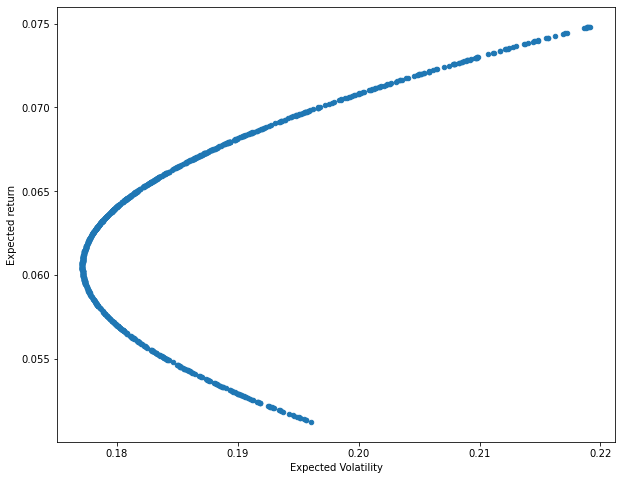

In [74]:
portfolio.plot(x='Volatility', y='Return',kind='scatter', figsize=(10,8));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected return')
plt.show()

In [76]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np

In [78]:
tickers = ['PG', '^GSPC']
df_b = pd.DataFrame()
for ticker in tickers:
    df_b[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

In [79]:
df_b

,PG,^GSPC
Date,,
1999-12-31,30.202621,1469.250000
2000-01-03,29.547920,1455.219971
2000-01-04,28.979359,1399.420044
2000-01-05,28.428026,1402.109985
2000-01-06,29.737432,1403.449951
...,...,...
2022-06-02,147.210007,4176.819824
2022-06-03,145.889999,4108.540039
2022-06-06,145.320007,4121.430176


In [89]:
df_b = np.log(df_b/df_b.shift(1))

In [90]:
cov_m = df_b.cov().iloc[0,1]

In [91]:
cov_m

8.203078861702653e-05

In [92]:
var_m = df_b.cov().iloc[1,1]

In [93]:
var_m

0.00015496756577458768

In [94]:
beta = cov_m/var_m

In [95]:
beta

0.5293416606694762

rf + beta(rf - rm)

In [97]:
pg_er = 0.025 + beta * 0.05

In [98]:
Sharpe = (pg_er - 0.025)/(df_b['PG'].std() * 250**0.5)

In [99]:
Sharpe

0.12259298531079119

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
rev_m = 170
rev_v = 10
iterations = 1000
rev = np.random.normal(rev_m, rev_v, iterations)

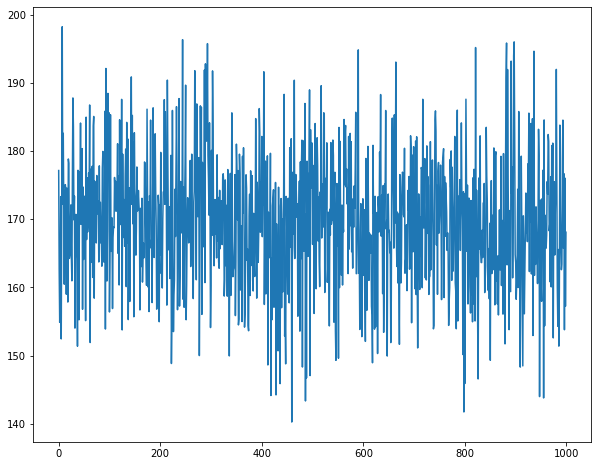

In [13]:
plt.figure(figsize=(10,8))
plt.plot(retn)
plt.show()

### cogs

In [14]:
cogs = -(rev * np.random.normal(0.6, 0.1))

In [16]:
cogs.mean()

-82.41435169636485

In [17]:
cogs.std()

4.910086712082911

### Gross profit

In [18]:
gross_p = rev - cogs

In [19]:
gross_p.min()

207.69107115607426

In [20]:
gross_p.max()

298.4033050074761

In [21]:
gross_p.mean()

252.38715142869094

In [23]:
# plotting histogram

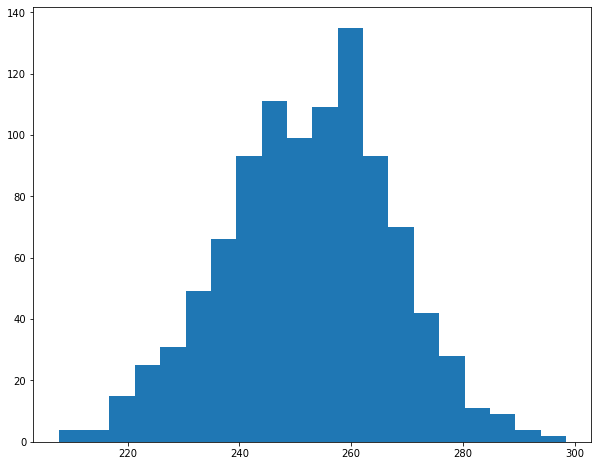

In [30]:
plt.figure(figsize=(10,8))
plt.hist(gross_p, bins=20)
plt.show()

In [32]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [34]:
df = wb.DataReader('pg', data_source='yahoo', start='2000-1-1')['Adj Close']

In [37]:
rtn = np.log(1 + df.pct_change())

In [38]:
rtn_mean = rtn.mean()
rtn_mean

0.0002769796423130234

In [40]:
rtn_std = rtn.std()
rtn_std

0.013653353257796517

In [41]:
rtn_var = rtn.var()
rtn_var

0.00018641405518218275

In [42]:
drift = rtn_mean - 0.5*rtn_var

In [45]:
drift

0.00018377261472193204

In [59]:
intervals = 1000
iters = 10
daily_returns = np.exp(drift + rtn_std*norm.ppf(np.random.rand(intervals,iters)))

In [72]:
daily_returns[-1]

array([1.01281396, 1.00198867, 1.01127301, 0.99939884, 0.9951699 ,
       0.99870754, 1.01114523, 1.03586975, 0.98613517, 1.02641287])

In [67]:
s0 = df.iloc[-1]

In [68]:
price_list = np.zeros_like(daily_returns)

In [69]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
price_list[0] = s0

In [71]:
price_list[0]

array([144.27999878, 144.27999878, 144.27999878, 144.27999878,
       144.27999878, 144.27999878, 144.27999878, 144.27999878,
       144.27999878, 144.27999878])

In [74]:
for t in range(1, 1000):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [75]:
price_list

array([[144.27999878, 144.27999878, 144.27999878, ..., 144.27999878,
        144.27999878, 144.27999878],
       [142.85831317, 143.46693283, 145.11582124, ..., 146.23777172,
        145.8266438 , 146.26540513],
       [147.47310166, 143.72812067, 145.94287477, ..., 143.05967771,
        145.29937264, 147.09428971],
       ...,
       [414.39443487, 147.95948556, 481.35332377, ..., 138.40135328,
         95.65215401, 252.24808604],
       [416.12112152, 148.77562561, 483.19074505, ..., 139.51815816,
         96.21451953, 252.75512711],
       [421.45328285, 149.07149058, 488.63775792, ..., 144.52264002,
         94.88052145, 259.4311142 ]])

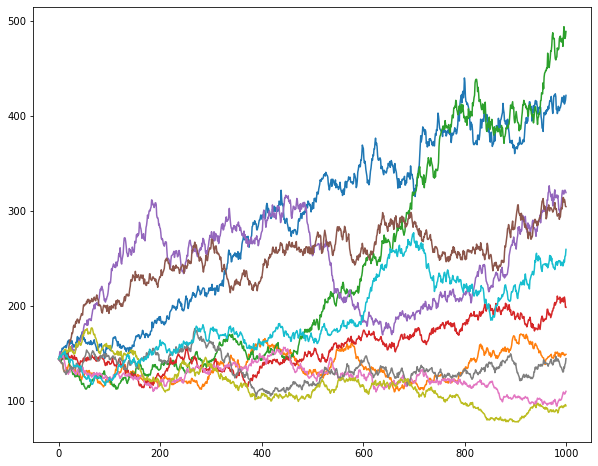

In [76]:
plt.figure(figsize=(10,8))
plt.plot(price_list)
plt.show()

In [38]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
from scipy.stats import norm

In [70]:
df = wb.DataReader('PG', data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [71]:
df.tail()

Date
2017-03-15    79.023499
2017-03-16    79.058075
2017-03-17    78.677650
2017-03-20    78.867867
2017-03-21    78.841934
Name: Adj Close, dtype: float64

In [58]:
log_rtn = np.log(1+ df.pct_change()) 

In [59]:
log_rtn.mean() * 250

0.06325995745114961

In [60]:
stdev = log_rtn.std() * np.sqrt(250)
stdev

0.17655013700885727

In [61]:
def d1(s, T, S, k):
    return  [np.log(S/k) + (r + s**2/2) * T] / s*np.sqrt(T)

In [62]:
def d2(s, T, S, k):
    return  [np.log(S/k) + (r - s**2)/2 * T] / s*np.sqrt(T)

In [63]:
def bsm(S, k, r, T, s):
    return (norm.cdf(d1(s, T, S, k))*S - norm.cdf(d2(s, T, S, k))*k*np.exp(-r*(T)))

In [64]:
S= df.iloc[-1]
S

78.84192657470703

In [65]:
k = 110
r = 0.025
s = stdev
T = 1

In [66]:
d1(s, T, S, k)

array([-1.65647264])

In [67]:
d2(s, T, S, k)

array([-1.9038242])

In [68]:
bsm(S, k, r, T, s)

array([0.79450945])

In [73]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df = wb.DataReader('PG', data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [76]:
log_rtn = np.log(1 + df.pct_change())
log_rtn.head()

Date
2007-01-03         NaN
2007-01-04   -0.007621
2007-01-05   -0.008624
2007-01-08    0.002202
2007-01-09   -0.002517
Name: Adj Close, dtype: float64

In [77]:
stdev = log_rtn.std() * 250**0.5
stdev

0.17655031130399518

In [104]:
T = 1.0
t_interval = 250
delta_t = t/interval
iterations = 10000
Z = np.random.standard_normal((interval+1,iterations))
S0 = df.iloc[-1]
S = np.zeros_like(Z)
S[0] = S0
r = 0.025

array([78.84194183, 78.84194183, 78.84194183, ..., 78.84194183,
       78.84194183, 78.84194183])

In [114]:
for i in range(1, t_interval+1):
    S[i] = S[i-1]*np.exp((r-0.5*stdev**2)*(delta_t + stdev*np.sqrt(delta_t)*Z[i]))

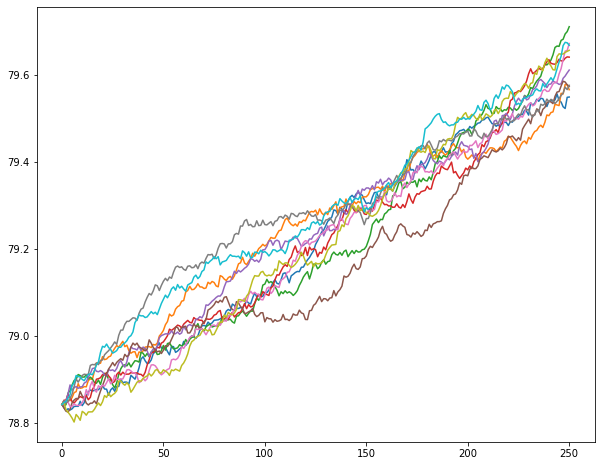

In [117]:
plt.figure(figsize=(10,8))
plt.plot(S[:,:10]);

In [120]:
print(1)

1
